<a href="https://colab.research.google.com/github/gokulbytes/credit-card-fraud-detection-system/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
# Install necessary libraries
!pip install pandas numpy scikit-learn imblearn matplotlib seaborn -q

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# main

In [3]:
# Load the dataset
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Drop duplicate rows and reset the index
df = df.drop_duplicates().reset_index(drop=True)

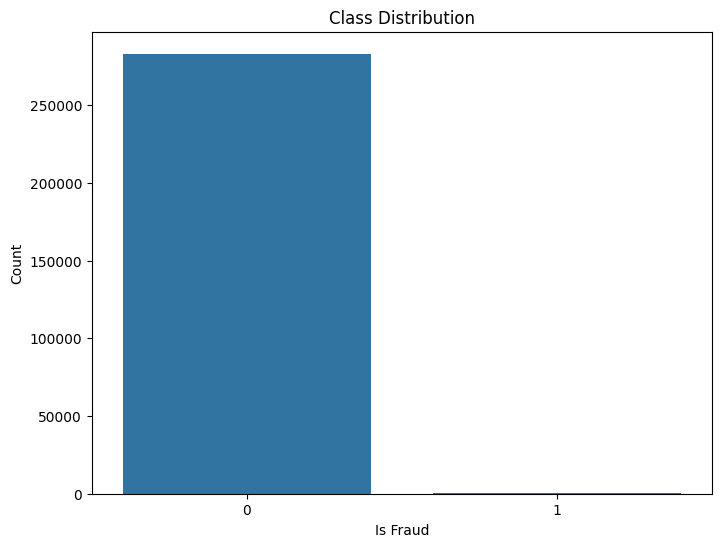

In [6]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [7]:
# Separate features (X) and target (y)
X = df.drop('Class',axis=1)
y = df['Class']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# stratify=y ensures that the proportion of the target variable (Class) is the same in both the training and testing sets
# random_state=123 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

## Class Oversampling

In [8]:
# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=123)

# Apply SMOTE to the training data to oversample the minority class
X_train, y_train = smote.fit_resample(X_train, y_train)

## Logistic Regression

In [9]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=123)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

### Model Evaluation

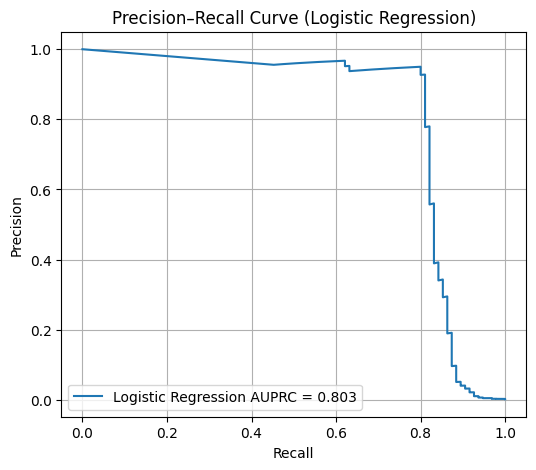

In [10]:
# Predict probabilities for the positive class on the test set
y_test_scores_lr = lr_model.predict_proba(X_test)[:, 1]

# Compute Precision–Recall curve and AUPRC for Logistic Regression
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_test_scores_lr)
auprc_lr = average_precision_score(y_test, y_test_scores_lr)

# Plot the Precision–Recall curve for Logistic Regression
plt.figure(figsize=(6, 5))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression AUPRC = {auprc_lr:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Logistic Regression)')
plt.legend()
plt.grid()
plt.show()

## Random Forest

In [11]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

### Model Evaluation

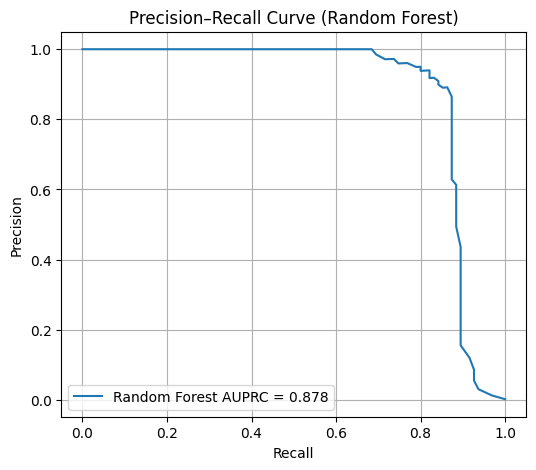

In [12]:
# Predict probabilities for the positive class on the test set
y_test_scores_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute Precision–Recall curve and AUPRC for Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_test_scores_rf)
auprc_rf = average_precision_score(y_test, y_test_scores_rf)

# Plot the Precision–Recall curve for Random Forest
plt.figure(figsize=(6, 5))
plt.plot(recall_rf, precision_rf, label=f'Random Forest AUPRC = {auprc_rf:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Random Forest)')
plt.legend()
plt.grid()
plt.show()

## XGBoost

In [13]:
# Initialize and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=123)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

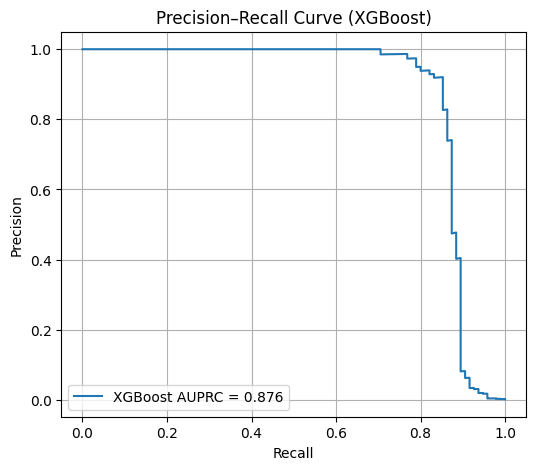

In [14]:
# Predict probabilities for the positive class on the test set
y_test_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute Precision–Recall curve and AUPRC for XGBoost
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_test_scores_xgb)
auprc_xgb = average_precision_score(y_test, y_test_scores_xgb)

# Plot the Precision–Recall curve for XGBoost
plt.figure(figsize=(6, 5))
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost AUPRC = {auprc_xgb:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (XGBoost)')
plt.legend()
plt.grid()
plt.show()

## Save Model

In [15]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')
print('Model saved successfully')

Model saved successfully


### Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
# Instantiate an XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='average_precision', cv=3, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

### Model Evaluation

In [ ]:
# Predict probabilities for the positive class on the test set
y_test_scores = grid_search.predict_proba(X_test)[:, 1]

# Compute Precision–Recall curve and AUPRC for XGBoost
precision, recall, thresholds = precision_recall_curve(y_test, y_test_scores)
auprc = average_precision_score(y_test, y_test_scores)

# Plot the Precision–Recall curve for XGBoost
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'XGBoost AUPRC = {auprc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (XGBoost)')
plt.legend()
plt.grid()
plt.show()